# 03_03: Indexing and slicing

In [3]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

Let's see how can we access individual elements and ranges of elements in NumPy. We will demonstrate on our good old friend Mona Lisa, so I will start by loading that array.

In [6]:
monalisa = np.load('monalisa.npy')

This is a three-dimensional NumPy array, with dimensions that correspond to height (1198 pixels), width (804 pixels), and color (the red, green, and blue components).

In [7]:
monalisa.shape

(1198, 804, 3)

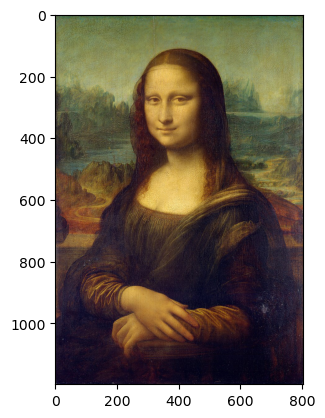

In [37]:
pp.imshow(monalisa)

The syntax to get at individual pixels is just an extension of Python list indexing, except that we can include multiple indices among brackets. For instance, a point roughly in the middle would be on row 600, column 400... and we'll grab the red component.

In [10]:
monalisa[600, 400, 0]

247

If we wish to go to the bottom right corner, we may count back from the boundaries of the array, just as we would do for a list.

In [11]:
monalisa[-50, -50, 1]

11

This should be the same as

In [9]:
monalisa[1198-50, 804-50, 1], monalisa[1148, 754, 1]

(11, 11)

If we try to index elements beyond the boundaries, we get an IndexError, as we should.

In [12]:
monalisa[1000, 900, 2]

IndexError: index 900 is out of bounds for axis 1 with size 804

And of course we can use indexing to assign values to the elements.

In [13]:
monalisa[600, 400, 0] = monalisa[600, 400, 1] = monalisa[600, 400, 2] = 0

Once you get used to multiindexing, you'll have the temptation of trying it on nested Python lists, but it does not work! Let me demonstrate with a very uninspired list:

In [14]:
just_a_list = [[1,2,3],[4,5,6],[7,8,9]]

In [15]:
just_a_list[1,2]

TypeError: list indices must be integers or slices, not tuple

With a list, we first need to extract an entire row, then the element.

In [16]:
just_a_list[1]

[4, 5, 6]

In [17]:
just_a_list[1][2]

6

Slicing also works in a very similar way to Python lists. For instance, we could grab a section in the middle of the painting. (If we want to display the array as an image, we need to include all three color channels. Remember that the stopping index of the slice is not included, so we code it as 0 to 3.)

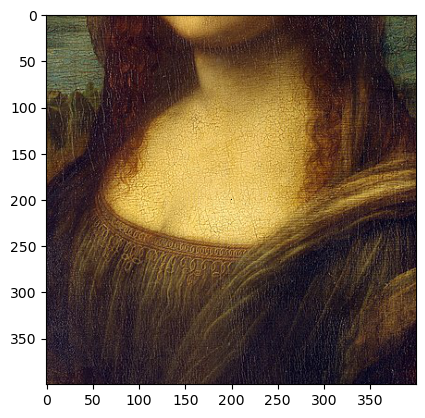

In [35]:
pp.imshow(monalisa[400:800, 200:600, 0:3])

We can omit either the starting or ending index: they will default to the beginning or end, respectively. And to grab the entire range we use a lonely colon.

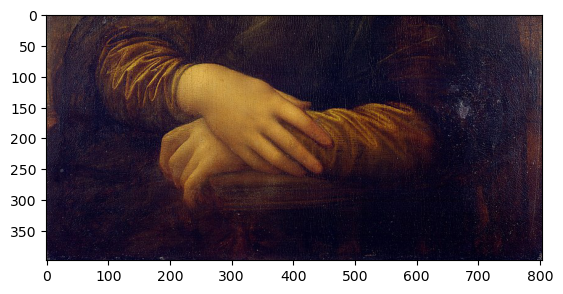

In [36]:
pp.imshow(monalisa[800:, :, :])

There is an even _shorter_ hand for multiple full slices, the ellipsis sign.

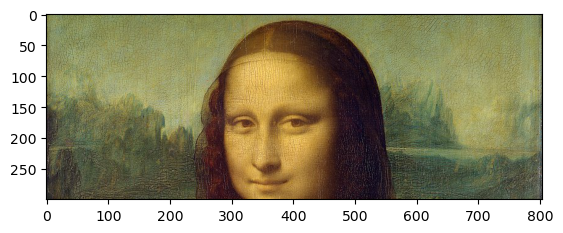

In [29]:
pp.imshow(monalisa[100:400, ...])

We can also specify a step, such as every twentieth pixel. This of course reduces the resolution of the picture.

See the black dot in the middle? It's there because earlier we assigned zero to all three color channels for pixel (600,400). The single pixel was invisible at higher resolution, but it's one of those selected by the slice with steps of 20.

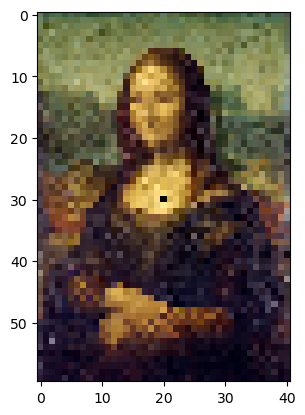

In [31]:
pp.imshow(monalisa[::20, ::20, :])

How about slicing backwards? Yes, that works too.

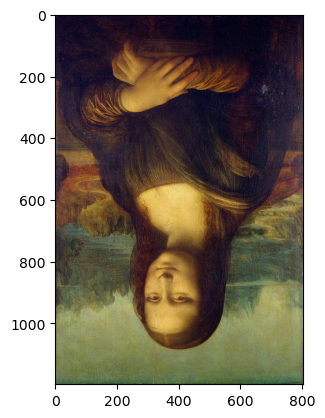

In [42]:
pp.imshow(monalisa[::-1, :, :])

If we mix slicing and indexing, we reduce the dimensionality of the array

In [53]:
row = monalisa[20, ::20, 0]

In [54]:
row.shape

(41,)

In [55]:
row

array([104,  81, 107, 100,  90,  98,  94, 103, 103,  97,  99, 105, 116,
       100,  90,  97,  85,  97,  93,  97, 104,  94,  85, 112,  92,  98,
        88,  81, 106,  79,  80,  91,  82, 100, 104,  88,  88,  79,  81,
        81,  88], dtype=uint8)

This is now a vector, a one-dimensional array, so we can't show it as an image, but we can plot it.

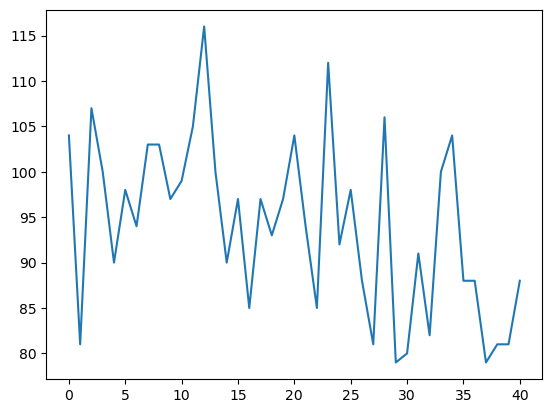

In [56]:
pp.plot(row)

Note that _fixing_ one of the indices is not the same thing as asking for a slice of 1:

In [57]:
rect = monalisa[20:21, ::20, 0]

In [58]:
rect

array([[104,  81, 107, 100,  90,  98,  94, 103, 103,  97,  99, 105, 116,
        100,  90,  97,  85,  97,  93,  97, 104,  94,  85, 112,  92,  98,
         88,  81, 106,  79,  80,  91,  82, 100, 104,  88,  88,  79,  81,
         81,  88]], dtype=uint8)

In [76]:
rect.shape

(1, 41)

Slicing can also be used on the left side of an assignment statement. We can use this to modify elements in bulk, and deface our painting.

In [66]:
monalisa[20:300, 20:300, :] = 200

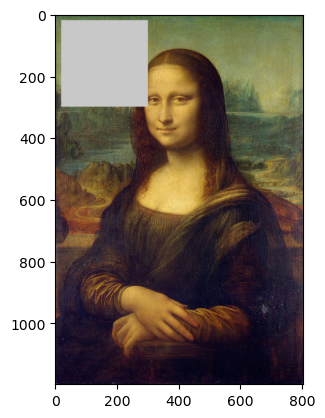

In [67]:
pp.imshow(monalisa)

Here I assigned the same value to all array elements in the slice, but I can also set them with another array of the right shape. Instead of the boring gray, we'll make some noise.

In [69]:
monalisa[20:300, 20:300, :] = np.random.randint(100, 255, size=(280, 280, 3))

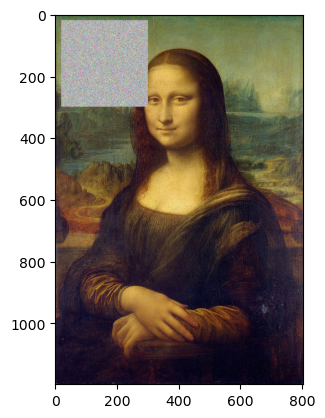

In [70]:
pp.imshow(monalisa)

NumPy arrays support also an especially useful form of indexing that is not available with lists: this is known as _fancy indexing_. That is, using arrays to index other arrays.

To demonstrate, let me grab my low-resolution, grayscale Mona Lisa:

In [76]:
monalisa_bw = np.loadtxt('monalisa.txt')

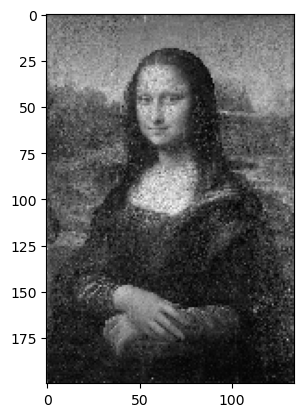

In [77]:
pp.imshow(monalisa_bw, cmap='gray')

I'm going to _threshold_ this image, by first figuring out all the pixels with gray values darker than approximately 50%.

In [78]:
monalisa_bw < 120

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

The result is a two-dimensional boolean array, with the same size as monalisa_bw. I use this boolean array to select the dark pixels alone, modify only those:

In [79]:
monalisa_bw[monalisa_bw < 120] = 0

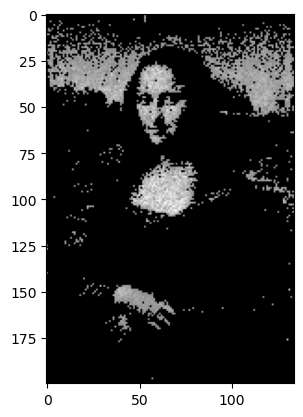

In [80]:
pp.imshow(monalisa_bw, cmap='gray')

Finally, I want to point out another very important difference between lists and numpy arrays.

Whenever you slice a list, you make a copy of it. Say I have a simple list of six elements.

In [81]:
mylist = [0,1,2,3,4,5]

And take a slice of the first four.

In [82]:
myslice = mylist[0:4]

Assigning to the slice does not modify the original list:

In [83]:
myslice[2] = myslice[3] = 100

In [84]:
myslice

[0, 1, 100, 100]

In [85]:
mylist

[0, 1, 2, 3, 4, 5]

By contrast, a slice of a numpy array is a new array that points to the same area of memory, with modified book-keeping that represents the different boundaries. So if I modify the slice (say, to make it darker), the original image is also affected.

In [125]:
monaslice = monalisa_bw[80:120, :]

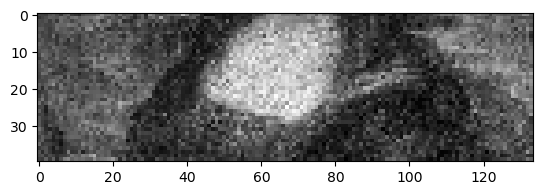

In [126]:
pp.imshow(monaslice, cmap='gray')

In [127]:
monaslice[:,:] /= 3 # divide by three in place

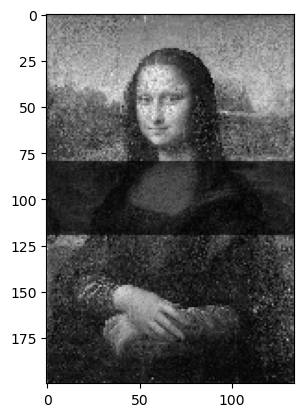

In [128]:
pp.imshow(monalisa_bw, cmap='gray')

If you want a true copy instead, pointing to new memory, which can be modified without affecting the original, you have to make the copy explicitly. Fancy indexing also creates a new array with independent memory.

In [129]:
monacopy = monalisa_bw.copy()